In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [7]:
label_encoder=preprocessing.LabelEncoder()

In [11]:
df['size_c']=label_encoder.fit_transform(df['size_category'])

In [14]:
df[['size_category','size_c']]

,size_category,size_c
0,small,1
1,small,1
2,small,1
3,small,1
4,small,1
...,...,...
512,large,0
513,large,0
514,large,0
515,small,1


In [15]:
df_new=df.drop(columns=(['month','day','size_category']),axis=1)

In [17]:
df_new

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_c
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df_new.shape

(517, 29)

In [20]:
df_new.duplicated().sum()

8

In [21]:
df_new=df_new.drop_duplicates()

In [22]:
df_new.shape

(509, 29)

# Splitting into train and test data

In [23]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

In [24]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_c, Length: 509, dtype: int32

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [29]:
x_train.shape

(356, 28)

In [30]:
x_test.shape

(153, 28)

In [31]:
y_train.shape

(356,)

In [32]:
y_test.shape

(153,)

# Creating Model

In [48]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(42,input_dim=28,activation='ReLU'))
model.add(tf.keras.layers.Dense(28,activation='ReLU'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 42)                1218      
                                                                 
 dense_7 (Dense)             (None, 28)                1204      
                                                                 
 dense_8 (Dense)             (None, 1)                 29        
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


# Compile Model


In [50]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit The Model


In [51]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =50, batch_size=10)

Epoch 1/50
36/36 [==============================] - 3s 30ms/step - loss: 12.3231 - accuracy: 0.5702 - val_loss: 1.1108 - val_accuracy: 0.6863
Epoch 2/50
36/36 [==============================] - 0s 10ms/step - loss: 1.4922 - accuracy: 0.6376 - val_loss: 0.7469 - val_accuracy: 0.7386
Epoch 3/50
36/36 [==============================] - 0s 10ms/step - loss: 0.6429 - accuracy: 0.7388 - val_loss: 0.6590 - val_accuracy: 0.7647
Epoch 4/50
36/36 [==============================] - 0s 9ms/step - loss: 0.5922 - accuracy: 0.7640 - val_loss: 0.4327 - val_accuracy: 0.8170
Epoch 5/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4201 - accuracy: 0.8174 - val_loss: 0.5281 - val_accuracy: 0.6993
Epoch 6/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4384 - accuracy: 0.8118 - val_loss: 0.3887 - val_accuracy: 0.8431
Epoch 7/50
36/36 [==============================] - 0s 10ms/step - loss: 0.4056 - accuracy: 0.8315 - val_loss: 0.3381 - val_accuracy: 0.8627
Epoch 8/50
36

In [52]:
model.save_weights("mywt.kmw")

# Evaluate the model


In [53]:
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 8ms/step - loss: 0.0266 - accuracy: 0.9888
accuracy: 98.88%


# Visualize Training History


In [54]:
# list all data in history
model.history.history.keys()
import matplotlib.pyplot as plt

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Summarize

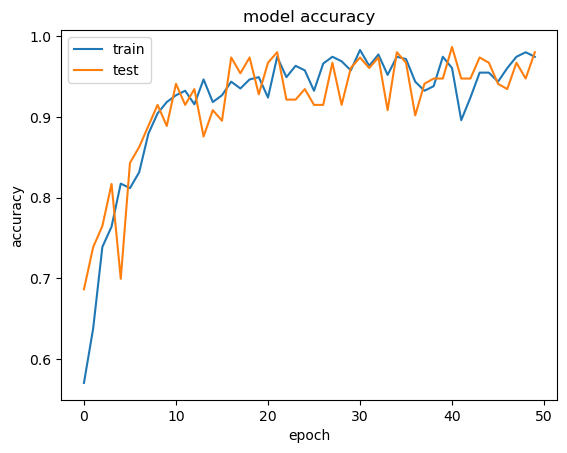

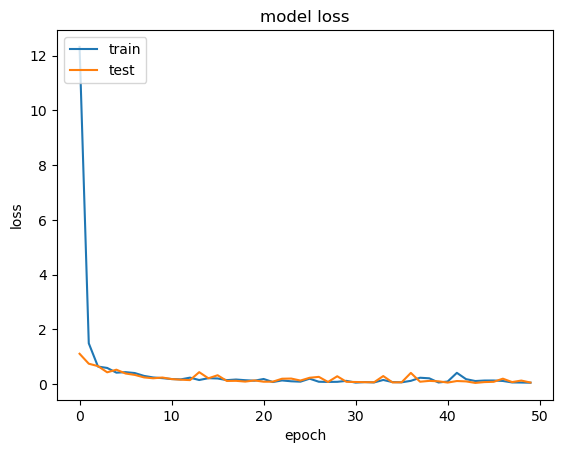

In [56]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate The Model


In [57]:

y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

5/5 [==============================] - 0s 7ms/step
Training set rmse: 0.083, Testing set rmse: 0.136


We can see that the rmse is very low and the accuracy of the model is also very good that is 98% 